<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-2-Classification-2/blob/master/Thursday_notes_lecture_(gradient_descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRADIENT DESCENT - FROM LECTURE

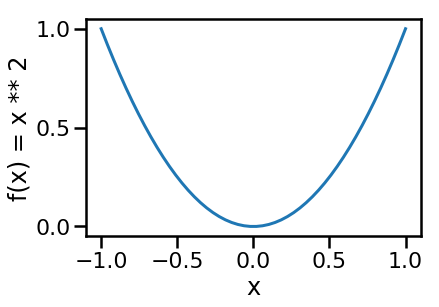

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('poster')

xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2');

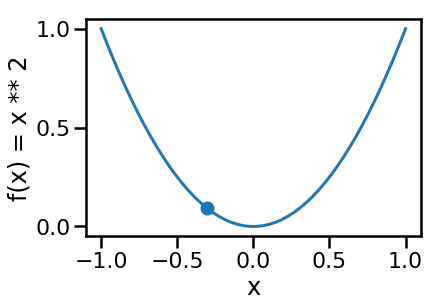

In [14]:
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2')

x = np.random.uniform(-1, 1)
y = x**2
plt.scatter(x, y);

Gradient: 0.5818575823451062
Shift to the left


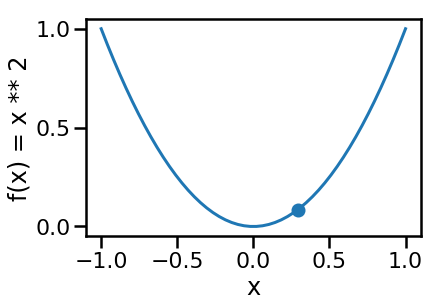

In [15]:
xs = np.linspace(start=-1, stop=1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x ** 2')

x = np.random.uniform(-1, 1)
y = x**2
plt.scatter(x, y)

derivative = 2*x
print('Gradient:', derivative)

if derivative > 0:
    print('Shift to the left')
    
elif derivative < 0:
    print('Shift to the right')
    
else:
    print(f'x={x} minimizes the value of this function')

In [16]:
from ipywidgets import interact

def check_slope(x=np.random.uniform(-1,1)):
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares)
    plt.xlabel('x')
    plt.ylabel('f(x) = x ** 2')
    
    y = x ** 2
    plt.scatter(x, y)
    
    derivative = 2 * x
    print('Gradient:', derivative)
    
    if derivative > 0:
        print('Shift to the left')
        
    elif derivative < 0:
        print('Shift to the right')
        
    else:
        print(f'x={x} minimizes the value of this function')
        
interact(check_slope, x=(-1,1,0.1));

interactive(children=(FloatSlider(value=-0.7183176162173261, description='x', max=1.0, min=-1.0), Output()), _…

In [17]:
iterations = 20
learning_rate = 0.1
x = np.random.uniform(-1, 1)

for _ in range(iterations):
    gradient = 2*x 
    x += learning_rate * -gradient
    print(x)

-0.6401532443829032
-0.5121225955063226
-0.40969807640505806
-0.32775846112404644
-0.26220676889923716
-0.20976541511938973
-0.16781233209551177
-0.13424986567640942
-0.10739989254112754
-0.08591991403290203
-0.06873593122632163
-0.054988744981057304
-0.04399099598484584
-0.03519279678787667
-0.02815423743030134
-0.022523389944241072
-0.01801871195539286
-0.014414969564314286
-0.011531975651451429
-0.009225580521161143


In [18]:
def gradient_descent(start_at=np.random.uniform(-1,1), 
                     iterations=20, 
                     learning_rate=0.1):
    xs = np.linspace(start=-1, stop=1)
    squares = xs ** 2
    plt.plot(xs, squares, color='grey')
    plt.xlabel('x')
    plt.ylabel('f(x) = x ** 2')
    
    x = start_at
    for _ in range(iterations):
        gradient = 2*x 
        x += learning_rate * -gradient
        y = x**2
        plt.scatter(x, y, color='grey', edgecolor='black', zorder=3)
    
interact(gradient_descent, 
         start_at=(-1,1,0.5), 
         iterations=(1,20,1), 
         learning_rate=(0.05,0.96,0.05));

interactive(children=(FloatSlider(value=0.4958328572146713, description='start_at', max=1.0, min=-1.0, step=0.…

In [19]:
from ipywidgets import fixed

data = sns.load_dataset('anscombe').query('dataset=="I"')

def linear_regression(m=0.5, b=3):
    sns.relplot(x='x', y='y', data=data)
    
    y_pred = m * data['x'] + b
    plt.plot(data['x'], y_pred)
    plt.show()
    
    error = y_pred - data['y']
    sse = np.sum(error ** 2)
    plt.scatter(m, sse)
    
    slopes = np.linspace(start=-1, stop=1)
    sses = []
    for slope in slopes:
        y_pred = slope * data['x'] + b
        error = data['y'] - y_pred
        sse = np.sum(error ** 2)
        sses.append(sse)
    plt.plot(slopes, sses)
    plt.title(f'Intercept={b}')
    plt.xlabel('Slope')
    plt.ylabel('Sum of Squared Error')
    
interact(linear_regression, m=(-1,1,0.1), b=fixed(3));

interactive(children=(FloatSlider(value=0.5, description='m', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

In [0]:
def descent(theta, alpha, x, y):
    intercept = theta[0]
    slope = theta[1]
    
    def hypothesis(x): return slope * x + intercept
    error = hypothesis(x) - y
    
    partial_derivative_intercept = np.mean(error)
    partial_derivative_slope = np.mean(error * x)
    
    intercept = intercept - alpha * partial_derivative_intercept
    slope = slope - alpha * partial_derivative_slope
    
    theta = intercept, slope
    return theta

In [23]:
x = np.linspace(-50, 50)
y = -20*x + 5

theta = [np.random.uniform(), np.random.uniform()]
alpha = 0.001

for _ in range(10000):
    theta = descent(theta, alpha, x, y)
    
intercept, slope = theta
print(f'y = {slope}*x + {intercept}')

y = -20.0*x + 4.9998089951577835


y = 0.5013345982740677*x + 2.9875308677613464


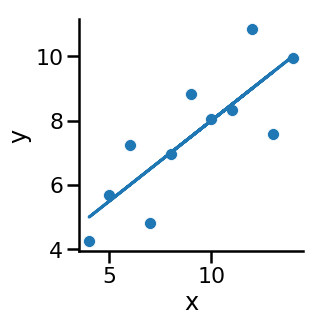

In [24]:
data = sns.load_dataset('anscombe').query('dataset=="I"')
sns.relplot(x='x', y='y', data=data)

theta = [np.random.uniform(), np.random.uniform()]
alpha = 0.01
for _ in range(5000):
    theta = descent(theta, alpha, data['x'], data['y'])
    
intercept, slope = theta
print(f'y = {slope}*x + {intercept}')

y_pred = slope * data['x'] + intercept
plt.plot(data['x'], y_pred);